<a href="https://colab.research.google.com/github/Arifanalysis/Fabric-class/blob/main/copy_of_mid_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sobouhiarif/fabric-classifications
#kaggle datasets download -d sobouhiarif/fabric-defect-test

Dataset URL: https://www.kaggle.com/datasets/sobouhiarif/fabric-classifications
License(s): unknown
100% 902M/903M [00:08<00:00, 129MB/s]
100% 903M/903M [00:08<00:00, 112MB/s]


In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/fabric-classifications.zip'

# Specify the directory where you want to extract the contents
extract_path = '/content/Fabric FDD/Fabric_classification'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from google.colab import files
import shutil
folder_path = "/content/Fabric FDD/Fabric_classification"
zip_file_path = "/content/fabric-classifications.zip"
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)

'/content/fabric-classifications.zip'

Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 784, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,925 (851.27 KB)

 Trainable params: 217,797 (850.77 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2262 - loss: 3.7206 - val_accuracy: 0.2196 - val_loss: 2.4875 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.3292 - loss: 2.3343 - val_accuracy: 0.2295 - val_loss: 2.3398 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4044 - loss: 2.1108 - val_accuracy: 0.3114 - val_loss: 2.1986 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4685 - loss: 1.9064 - val_accuracy: 0.3154 - val_loss: 2.0650 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5485 - loss: 1.7069 - val_accuracy: 0.4551 - val_loss: 1.8862 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5690 - loss: 1.5294 - val_accuracy: 0.5130 - val_loss: 1.7312 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6504 - loss: 1.3030 - val_accu

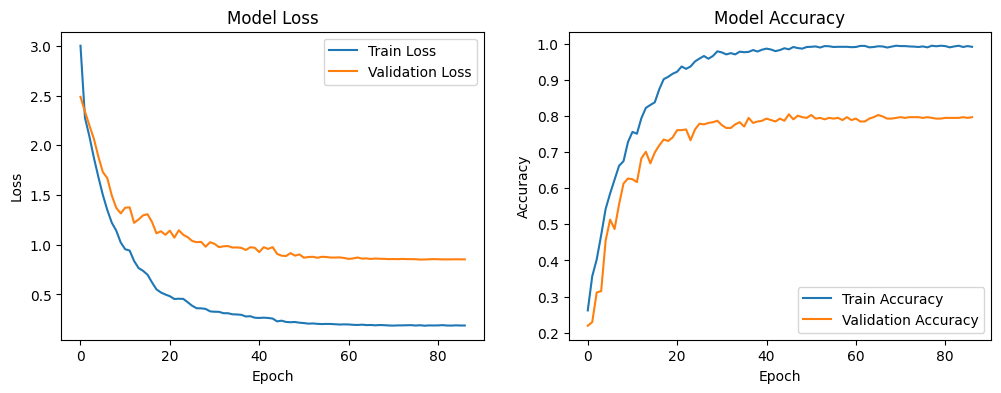

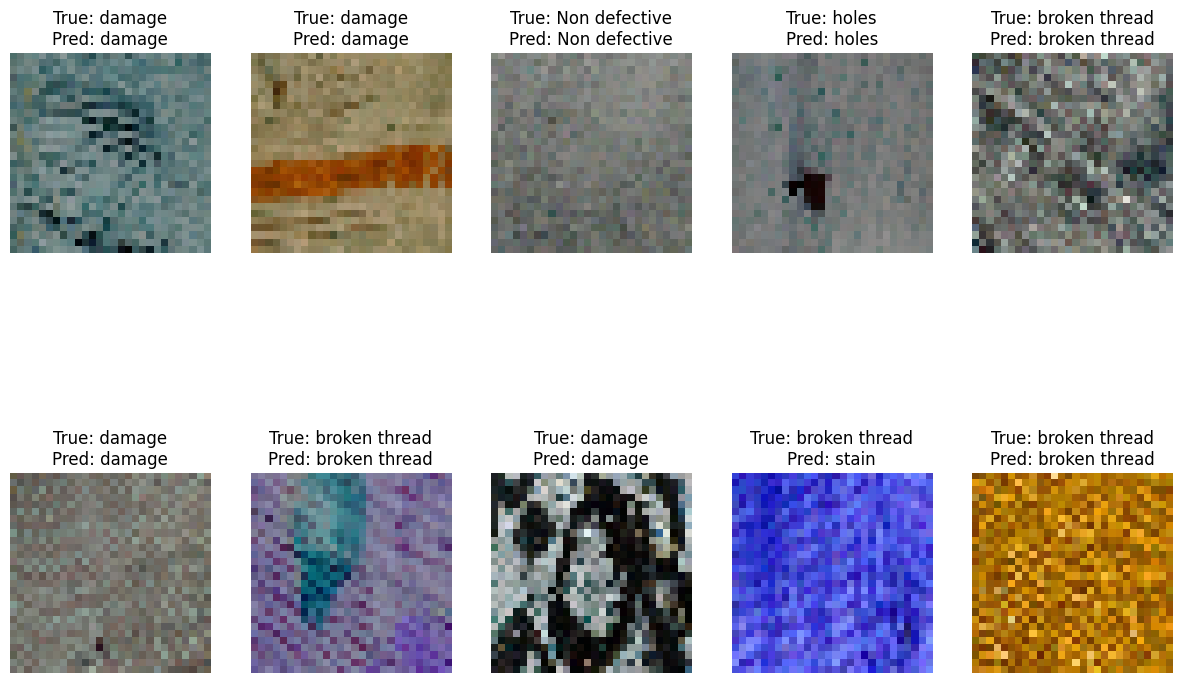

In [ ]:
#single LSTM-CNN
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}  # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the single LSTM-CNN model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

# Ensure the input dimension is compatible with Conv1D
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and add the output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize some test images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(testX[i].reshape(28, 28, 3))  # Reshape back to original image dimensions
    plt.title(f"True: {categories[trueY_classes[i]]}\nPred: {categories[predY_classes[i]]}")
    plt.axis('off')
plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 784, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 392, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 392, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 392, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 392, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 196, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │          62,725 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,917 (1.06 MB)

 Trainable params: 278,661 (1.06 MB)

 Non-trainable params: 256 (1.00 KB)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.2232 - loss: 4.5473 - val_accuracy: 0.2156 - val_loss: 3.3355 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.2462 - loss: 4.1063 - val_accuracy: 0.1876 - val_loss: 3.3650 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2913 - loss: 3.7123 - val_accuracy: 0.1876 - val_loss: 3.7642 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.2926 - loss: 3.5463 - val_accuracy: 0.1816 - val_loss: 3.1904 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.3456 - loss: 3.2555 - val_accuracy: 0.1996 - val_loss: 3.6852 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.3961 - loss: 2.8888 - val_accuracy: 0.2136 - val_loss: 3.5671 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4128 - loss: 2.8198
Epoch 

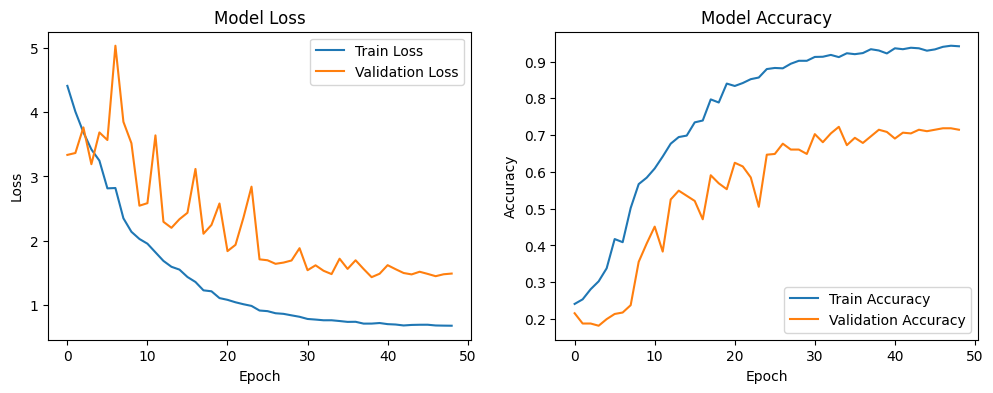

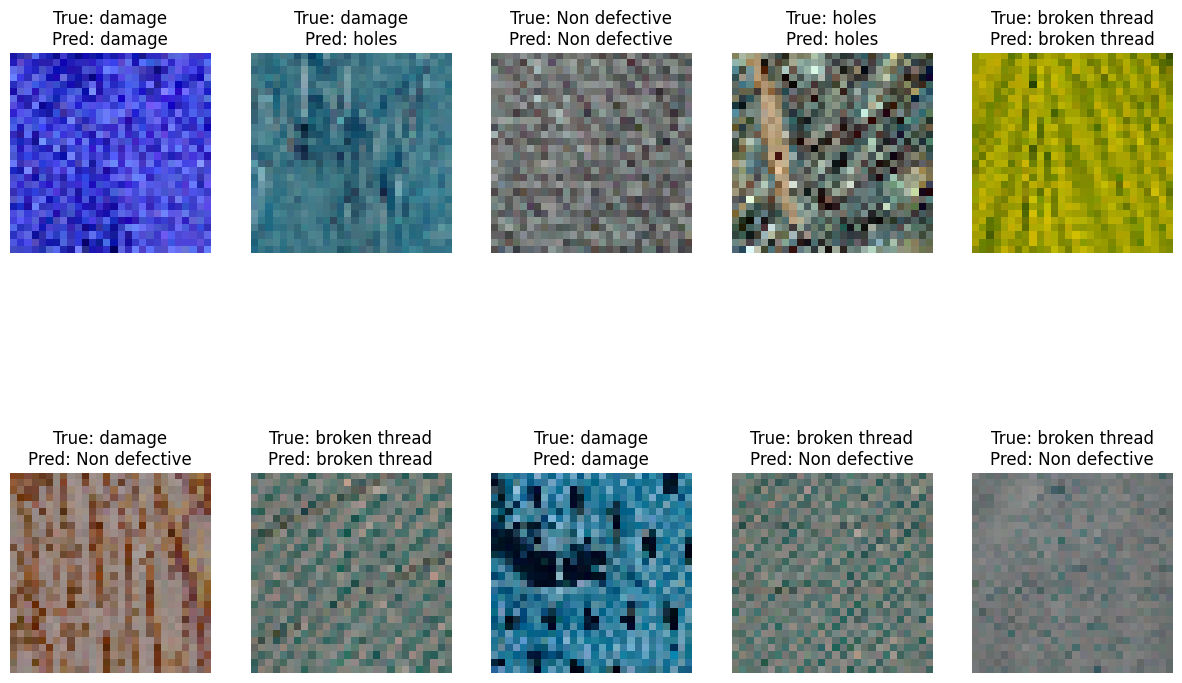

In [ ]:
#DOUBLE LSTM-CNN
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}  # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the LSTM-CNN model with Two LSTM-CNN Layers
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

# Ensure the input dimension is compatible with Conv1D
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Second LSTM-CNN Layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Flatten and add the output layer
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize some test images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(testX[i].reshape(28, 28, 3))  # Reshape back to original image dimensions
    plt.title(f"True: {categories[trueY_classes[i]]}\nPred: {categories[predY_classes[i]]}")
    plt.axis('off')
plt.show()


Image counts per category: {'stain': 500, 'damage': 500, 'broken thread': 502, 'holes': 500, 'Non defective': 500}
Shape of trainX: (2001, 784, 3)
Shape of testX: (501, 784, 3)
Shape of trainY: (2001, 5)
Shape of testY: (501, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 784, 128)            │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 784, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 784, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 784, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 392, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 392, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 392, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 392, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 392, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 196, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 196, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 196, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 196, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 196, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 98, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │          31,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371,269 (1.42 MB)

 Trainable params: 370,885 (1.41 MB)

 Non-trainable params: 384 (1.50 KB)

None
Epoch 1/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.2317 - loss: 5.2161 - val_accuracy: 0.1876 - val_loss: 4.1573 - learning_rate: 0.0010
Epoch 2/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.2970 - loss: 4.6041 - val_accuracy: 0.1996 - val_loss: 3.9982 - learning_rate: 0.0010
Epoch 3/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.3163 - loss: 3.9979 - val_accuracy: 0.1996 - val_loss: 3.8581 - learning_rate: 0.0010
Epoch 4/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.3718 - loss: 3.5923 - val_accuracy: 0.1876 - val_loss: 3.9244 - learning_rate: 0.0010
Epoch 5/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.4185 - loss: 3.2597 - val_accuracy: 0.2016 - val_loss: 3.8196 - learning_rate: 0.0010
Epoch 6/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.4120 - loss: 3.0557 - val_accuracy: 0.2056 - val_loss: 5.1356 - learning_rate: 0.0010
Epoch 7/90
63/63 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.4519 - loss: 2.8389 - va

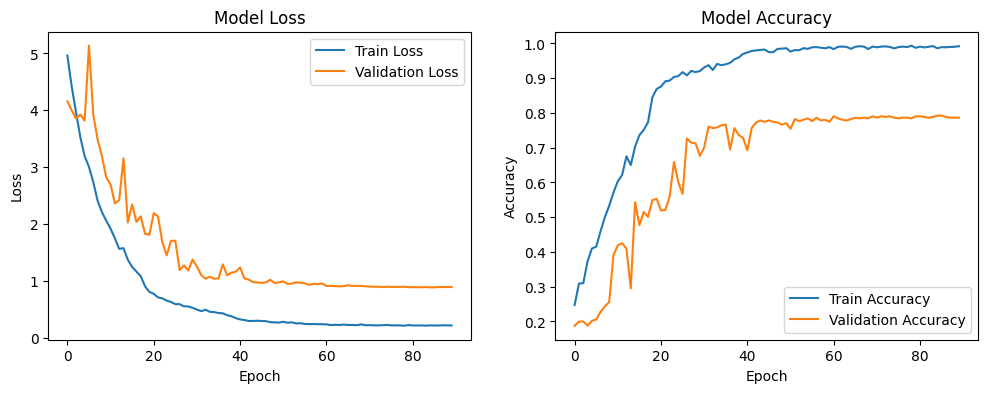

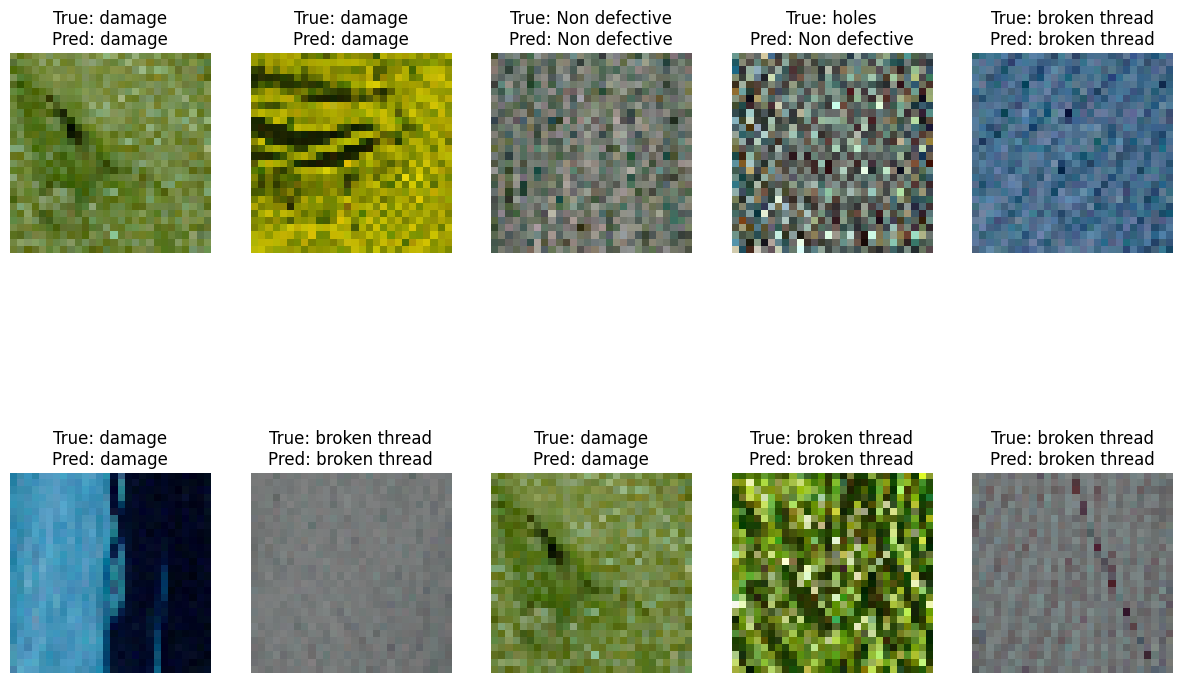

In [ ]:
#TRIPLE LSTM-CNN
import os
import cv2
import numpy as np
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Function to load the Kaggle image dataset in .jpg format
def load_dataset():
    base_dir = '/content/Fabric FDD/Fabric_classification/Fabric classification'
    categories = ['stain', 'damage', 'broken thread', 'holes', 'Non defective']
    images = []
    labels = []
    category_counts = {category: 0 for category in categories}  # To track the number of images per category

    for label, category in enumerate(categories):
        category_dir = os.path.join(base_dir, category)
        if not os.path.exists(category_dir):
            print(f"Directory {category_dir} does not exist. Skipping this category.")
            continue
        for filename in os.listdir(category_dir):
            if filename.endswith('.jpg'):
                img = cv2.imread(os.path.join(category_dir, filename))
                img = cv2.resize(img, (28, 28))  # Resize image to 28x28
                images.append(img)
                labels.append(label)
                category_counts[category] += 1  # Count the images for each category

    images = np.array(images)
    labels = np.array(labels)

    print("Image counts per category:", category_counts)  # Print the counts for debugging

    return images, labels, categories

# Load the Kaggle image dataset
images, labels, categories = load_dataset()

if len(images) == 0:
    raise ValueError("No images found. Please check the dataset path and ensure images are available.")

# Preprocess the images (normalize pixel values)
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(categories))

# Reshape images for LSTM input (assuming each image is treated as a sequence of pixels)
images = images.reshape(images.shape[0], -1, images.shape[3])  # Adjust to (batch_size, sequence_length, feature_dim)

# Split the dataset into training and test sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify shapes of trainX, testX, trainY, testY
print("Shape of trainX:", trainX.shape)
print("Shape of testX:", testX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testY:", testY.shape)

# Define the LSTM-CNN model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.5))

# Ensure the input dimension is compatible with Conv1D
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(len(categories), activation='softmax', kernel_regularizer='l2'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=90, batch_size=32, validation_data=(testX, testY), callbacks=[lr_reduction, early_stopping], verbose=1)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predictions for the test set
predY = model.predict(testX)
predY_classes = np.argmax(predY, axis=1)
trueY_classes = np.argmax(testY, axis=1)

# Ensure we only use labels present in the test set
unique_true_labels = np.unique(trueY_classes)

# Print classification report
class_report = classification_report(
    trueY_classes, predY_classes,
    target_names=[categories[i] for i in unique_true_labels],
    output_dict=True,
    zero_division=0
)
print(class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(trueY_classes, predY_classes)
print(conf_matrix)

# Calculate and print additional metrics
accuracy_scores = accuracy_score(trueY_classes, predY_classes)
f1_scores = f1_score(trueY_classes, predY_classes, average=None)

print("Accuracy Scores: ", accuracy_scores)
print("F1 Scores: ", f1_scores)
print("Average F1 Score: ", np.mean(f1_scores))

print(f"Total Training Time: {end_time - start_time} seconds")

# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Visualize some test images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(testX[i].reshape(28, 28, 3))  # Reshape back to original image dimensions
    plt.title(f"True: {categories[trueY_classes[i]]}\nPred: {categories[predY_classes[i]]}")
    plt.axis('off')
plt.show()
